In [22]:
#import all the packages and install packages
#pip install pyabf
import pyabf
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.preprocessing import MinMaxScaler

In [23]:
#read the files for future training
filename = 'combined_length_2000px_v1.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    combined_ratios_all = pickle.load(file)

In [24]:
# Select all columns except the last two as inputs
combined_ratios = combined_ratios_all.iloc[:, :-3]
# Select the last two columns as labels
labels = combined_ratios_all.iloc[:, -2:]

#binary labels for models to learn
labels_column = labels[2005].tolist()
#binary_labels = [0 if label == 0 else 1 for label in labels_column]
ground_truth = labels_column
len(ground_truth)

2400

In [25]:
#normalizing all the columns
cols_to_normalize = combined_ratios.columns[-3:]
scaler = MinMaxScaler()
# Normalize the last four columns
combined_ratios[cols_to_normalize] = scaler.fit_transform(combined_ratios[cols_to_normalize])
# Print the normalized DataFrame
combined_ratios

,0,1,2,3,4,5,6,7,8,9,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.176782,0.159095,0.184615
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095715,0.201696,0.279487
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048077,0.168960,0.217949
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139220,0.209123,0.250000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099666,0.222215,0.220513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.494363,0.520569,0.421795
2396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.446709,0.590220,0.517949
2397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.446062,0.589115,0.546154
2398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293630,0.540987,0.523077


In [26]:
# Convert ground_truth to a numpy array for easier indexing
from sklearn.model_selection import train_test_split
ground_truth = np.array(ground_truth)
# Initialize empty lists to store training and testing datasets and labels
training_data = []
testing_data = []
training_labels = []
testing_labels = []

# Get unique labels from the ground_truth list
unique_labels = np.unique(ground_truth)

# Iterate over each unique label
for label in unique_labels:
    # Find the indices where the label matches
    label_indices = np.where(ground_truth == label)[0]

    # Check if there is more than one sample for the label
    if len(label_indices) > 1:
        # Split the label indices into training and testing sets with an 80/20 ratio
        train_indices, test_indices = train_test_split(label_indices, test_size=0.2, random_state=42)

        # Append the corresponding rows from combined_ratios to the training and testing datasets
        training_data.append(combined_ratios.iloc[train_indices])
        testing_data.append(combined_ratios.iloc[test_indices])

        # Append the corresponding labels to the training and testing labels
        training_labels.extend(ground_truth[train_indices])
        testing_labels.extend(ground_truth[test_indices])

# Concatenate all training datasets into a single DataFrame
training_data = pd.concat(training_data)

# Concatenate all testing datasets into a single DataFrame
testing_data = pd.concat(testing_data)

In [27]:
testing_data

,0,1,2,3,4,5,6,7,8,9,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181884,0.179266,0.223077
218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.234957,0.138508,0.162821
258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103649,0.143404,0.173077
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154213,0.079787,0.134615
42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134652,0.150942,0.211538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256917,0.721452,0.734615
1803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.558965,0.454109,0.405128
1921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527781,0.541081,0.466667
1891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.369758,0.567716,0.526923


In [28]:
training_flatten = training_data.values
testing_flatten = testing_data.values
training_graph_data = training_data.iloc[:, :2000].values
testing_graph_data = testing_data.iloc[:, :2000].values

In [29]:
#convert ground truth to encoded_labels for NN
unique_training_classes = np.unique(training_labels)# Find the unique classes
unique_testing_classes = np.unique(testing_labels)

num_training_classes = len(unique_training_classes)
num_testing_classes = len(unique_testing_classes)

encoded_training_labels = np.zeros((len(training_labels), num_training_classes))  # Initialize an array for one-hot encoding
encoded_testing_labels = np.zeros((len(testing_labels), num_testing_classes))

for i, label in enumerate(training_labels):
    class_training_index = np.where(unique_training_classes == label)[0][0]  # Find the index of the class
    encoded_training_labels[i, class_training_index] = 1  # Set the corresponding element to 1
    
for i, label in enumerate(testing_labels):
    class_testing_index = np.where(unique_testing_classes == label)[0][0]  # Find the index of the class
    encoded_testing_labels[i, class_testing_index] = 1  # Set the corresponding element to 1

print(encoded_testing_labels)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [30]:
#training and testing datasets for all descriptor datasets
X_train_NN = np.array(training_graph_data)
X_test_NN = np.array(testing_graph_data)
y_train_NN = encoded_training_labels
y_test_NN = encoded_testing_labels
X_train = training_graph_data
X_test = testing_graph_data

In [31]:
# Original dimensions
num_rows = 50
num_columns = 40
# Initialize an empty list to store the 2D arrays
unflattened_training_arrays = []
# Iterate over each row of the flattened array
for row in X_train_NN:
    # Reshape the row into a 2D array
    unflattened_training_row = row.reshape(num_rows, num_columns)
    # Append the unflattened row to the list
    unflattened_training_arrays.append(unflattened_training_row)
# Convert the list of 2D arrays into a new array
training_graph_array = np.array(unflattened_training_arrays)

unflattened_testing_arrays = []
for row in X_test_NN:
    # Reshape the row into a 2D array
    unflattened_testing_row = row.reshape(num_rows, num_columns)
    # Append the unflattened row to the list
    unflattened_testing_arrays.append(unflattened_testing_row)
# Convert the list of 2D arrays into a new array
testing_graph_array = np.array(unflattened_testing_arrays)

#test which CNN to use is better
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

#get the datasets ready
train_data = training_graph_array
test_data = testing_graph_array
train_labels = encoded_training_labels
test_labels = encoded_testing_labels

# Normalize data
scaler = MinMaxScaler()
scaler.fit(train_data.reshape(train_data.shape[0], -1))  # Fit the scaler on the flattened data

train_data_normalized = scaler.transform(train_data.reshape(train_data.shape[0], -1))
test_data_normalized = scaler.transform(test_data.reshape(test_data.shape[0], -1))

# Reshape the normalized data back to 3D
train_data_normalized_3d = train_data_normalized.reshape(train_data.shape)
test_data_normalized_3d = test_data_normalized.reshape(test_data.shape)

# Add a channel dimension to the data
train_data_normalized_3d = np.expand_dims(train_data_normalized_3d, axis=-1)
test_data_normalized_3d = np.expand_dims(test_data_normalized_3d, axis=-1)

# Design CNN architecture
model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(2, 2), activation="relu", input_shape=train_data_normalized_3d.shape[1:]),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(2, 2), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(2, 2), activation="relu", padding="same"),
    #layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    #layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    #layers.Dense(128, activation='relu'),
    #layers.Dense(128, activation='relu'),
    #layers.Dense(128, activation='relu'),
    layers.Dense(5, activation="softmax")
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_runs = 10
losses = []
accuracies = []

for i in range(num_runs):
    # Define the early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(train_data_normalized_3d, train_labels, epochs=100, batch_size=32, validation_data=(test_data_normalized_3d, test_labels), callbacks=[early_stopping])

    # Evaluate the best model on the test data
    loss, accuracy = model.evaluate(test_data_normalized_3d, test_labels)
    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the average loss and accuracy
average_loss = sum(losses) / num_runs
average_accuracy = sum(accuracies) / num_runs

# Print the average loss and accuracy
print("Average loss:", average_loss)
print("Average accuracy:", average_accuracy)

In [32]:
#extracting CNN model's output
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

#get the datasets ready
train_data = training_graph_array
test_data = testing_graph_array
train_labels = encoded_training_labels
test_labels = encoded_testing_labels

# Normalize data
scaler = MinMaxScaler()
scaler.fit(train_data.reshape(train_data.shape[0], -1))  # Fit the scaler on the flattened data

train_data_normalized = scaler.transform(train_data.reshape(train_data.shape[0], -1))
test_data_normalized = scaler.transform(test_data.reshape(test_data.shape[0], -1))

# Reshape the normalized data back to 3D
train_data_normalized_3d = train_data_normalized.reshape(train_data.shape)
test_data_normalized_3d = test_data_normalized.reshape(test_data.shape)

# Add a channel dimension to the data
train_data_normalized_3d = np.expand_dims(train_data_normalized_3d, axis=-1)
test_data_normalized_3d = np.expand_dims(test_data_normalized_3d, axis=-1)

# Design CNN architecture
CNN_model = keras.Sequential([
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=train_data_normalized_3d.shape[1:]),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(2, 2), activation="relu", padding="same"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten()
])

cnn_training_features = CNN_model(train_data_normalized_3d)
cnn_testing_features = CNN_model(test_data_normalized_3d)

In [33]:
#get the additional columns out and combine them with CNN data
#define the additional data
training_add = training_data.iloc[:,-3:]
testing_add = testing_data.iloc[:,-3:]
train_labels_add = encoded_training_labels
test_labels_add = encoded_testing_labels


# Reset the index of the additional data
training_add.reset_index(drop=True, inplace=True)
testing_add.reset_index(drop=True, inplace=True)

# Convert the existing data to a DataFrame
CNN_training_df = pd.DataFrame(cnn_training_features)
CNN_testing_df = pd.DataFrame(cnn_testing_features)

# Merge the existing data and additional data based on their indexes
combined_training_data = pd.merge(CNN_training_df, training_add, left_index=True, right_index=True)
combined_testing_data = pd.merge(CNN_testing_df, testing_add, left_index=True, right_index=True)
combined_testing_data

,0,1,2,3,4,5,6,7,8,9,...,6137,6138,6139,6140,6141,6142,6143,2000_y,2001_y,2002_y
0,0.000665,0.0,0.016883,0.004143,0.004617,0.001014,0.001037,0.008501,0.0,0.001176,...,0.000000,0.000000,0.004962,0.017345,0.000000,0.001677,0.022271,0.181884,0.179266,0.223077
1,0.004715,0.0,0.016102,0.008082,0.005102,0.001503,0.000000,0.009173,0.0,0.000194,...,0.000743,0.000483,0.000000,0.010475,0.000000,0.013006,0.010893,0.234957,0.138508,0.162821
2,0.002358,0.0,0.011786,0.005240,0.007195,0.004424,0.000000,0.000341,0.0,0.000000,...,0.000000,0.000000,0.000000,0.022461,0.000000,0.000004,0.042923,0.103649,0.143404,0.173077
3,0.004962,0.0,0.017300,0.006865,0.007166,0.000535,0.000000,0.006967,0.0,0.000454,...,0.010551,0.000000,0.000000,0.013109,0.000000,0.005582,0.009758,0.154213,0.079787,0.134615
4,0.000000,0.0,0.016453,0.002838,0.007225,0.000103,0.000000,0.007687,0.0,0.001048,...,0.000000,0.000021,0.000086,0.025291,0.000226,0.004627,0.017822,0.134652,0.150942,0.211538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.000993,0.0,0.002197,0.001687,0.000000,0.000000,0.000068,0.000000,0.0,0.000192,...,0.000216,0.003808,0.000000,0.005575,0.000000,0.001778,0.006547,0.256917,0.721452,0.734615
481,0.001234,0.0,0.007678,0.003489,0.001688,0.000275,0.000000,0.004309,0.0,0.000280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.558965,0.454109,0.405128
482,0.001312,0.0,0.007387,0.002894,0.002422,0.000335,0.000000,0.002547,0.0,0.000662,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.527781,0.541081,0.466667
483,0.001337,0.0,0.004604,0.002106,0.000878,0.000109,0.000283,0.000402,0.0,0.000301,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369758,0.567716,0.526923


In [42]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

# Define the neural network architecture
model = keras.Sequential([
    #keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    #keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_runs = 10
losses = []
accuracies = []

for i in range(num_runs):
    # Define the early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    history = model.fit(combined_training_data, train_labels_add, epochs=100, batch_size=32, validation_data=(combined_testing_data, test_labels_add), callbacks=[early_stopping])

    # Evaluate the best model on the test data
    loss, accuracy = model.evaluate(combined_testing_data, test_labels_add)
    losses.append(loss)
    accuracies.append(accuracy)

# Calculate the average loss and accuracy
average_loss = sum(losses) / num_runs
average_accuracy = sum(accuracies) / num_runs

# Print the average loss and accuracy
print("Average loss:", average_loss)
print("Average accuracy:", average_accuracy)

# Evaluate the model on the test data
y_pred_prob = model.predict(combined_testing_data)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels
test_labels = np.argmax(test_labels_add, axis=1)

#Calcualte f1 score
f1 = f1_score(test_labels, y_pred, average='weighted')

# Print the best epoch and F1 score
print("F1 score:", f1)

import winsound

# Your code here

# Code execution completed, play a beep sound
frequency = 2500  # Set frequency (in Hz)
duration = 1000   # Set duration (in milliseconds)
winsound.Beep(frequency, duration)

Epoch 1/100
60/60 [==============================] - 1s 12ms/step - loss: 1.7714 - accuracy: 0.4877 - val_loss: 1.4478 - val_accuracy: 0.6433
Epoch 2/100
60/60 [==============================] - 0s 7ms/step - loss: 1.3011 - accuracy: 0.6893 - val_loss: 1.1697 - val_accuracy: 0.7526
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 1.0638 - accuracy: 0.7629 - val_loss: 0.9819 - val_accuracy: 0.7608
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 0.8990 - accuracy: 0.7885 - val_loss: 0.8431 - val_accuracy: 0.7959
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.7697 - accuracy: 0.8131 - val_loss: 0.7517 - val_accuracy: 0.8103
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.8230 - val_loss: 0.6804 - val_accuracy: 0.8206
Epoch 7/100
60/60 [==============================] - 0s 7ms/step - loss: 0.6237 - accuracy: 0.8277 - val_loss: 0.6250 - val_accuracy: 0.8392
Epoch 8/100


60/60 [==============================] - 0s 6ms/step - loss: 0.1481 - accuracy: 0.9561 - val_loss: 0.4011 - val_accuracy: 0.8907
Epoch 4/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1425 - accuracy: 0.9593 - val_loss: 0.4100 - val_accuracy: 0.8742
Epoch 5/100
60/60 [==============================] - 0s 5ms/step - loss: 0.1396 - accuracy: 0.9582 - val_loss: 0.4148 - val_accuracy: 0.8866
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1383 - accuracy: 0.9634 - val_loss: 0.4015 - val_accuracy: 0.8845
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1300 - accuracy: 0.9650 - val_loss: 0.4070 - val_accuracy: 0.8825
Epoch 8/100
60/60 [==============================] - 0s 6ms/step - loss: 0.1278 - accuracy: 0.9697 - val_loss: 0.4124 - val_accuracy: 0.8845
Epoch 9/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1219 - accuracy: 0.9671 - val_loss: 0.4028 - val_accuracy: 0.8866
Epoch 10/100
60/60 [=====

60/60 [==============================] - 1s 10ms/step - loss: 0.0827 - accuracy: 0.9828 - val_loss: 0.4032 - val_accuracy: 0.8887
Epoch 9/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0816 - accuracy: 0.9859 - val_loss: 0.4186 - val_accuracy: 0.8948
Epoch 10/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0782 - accuracy: 0.9859 - val_loss: 0.4209 - val_accuracy: 0.8887
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.8866
Epoch 1/100
60/60 [==============================] - 0s 8ms/step - loss: 0.1063 - accuracy: 0.9728 - val_loss: 0.4042 - val_accuracy: 0.8763
Epoch 2/100
60/60 [==============================] - 0s 7ms/step - loss: 0.1030 - accuracy: 0.9744 - val_loss: 0.4027 - val_accuracy: 0.8845
Epoch 3/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0998 - accuracy: 0.9802 - val_loss: 0.4103 - val_accuracy: 0.8948
Epoch 4/100
60/60 [==============================] - 0s 6ms/step

60/60 [==============================] - 0s 6ms/step - loss: 0.0445 - accuracy: 0.9943 - val_loss: 0.4499 - val_accuracy: 0.8887
Epoch 11/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4154 - accuracy: 0.8907
Average loss: 0.40086967647075655
Average accuracy: 0.8837113499641418
16/16 [==============================] - 0s 2ms/step
F1 score: 0.8788752203571861


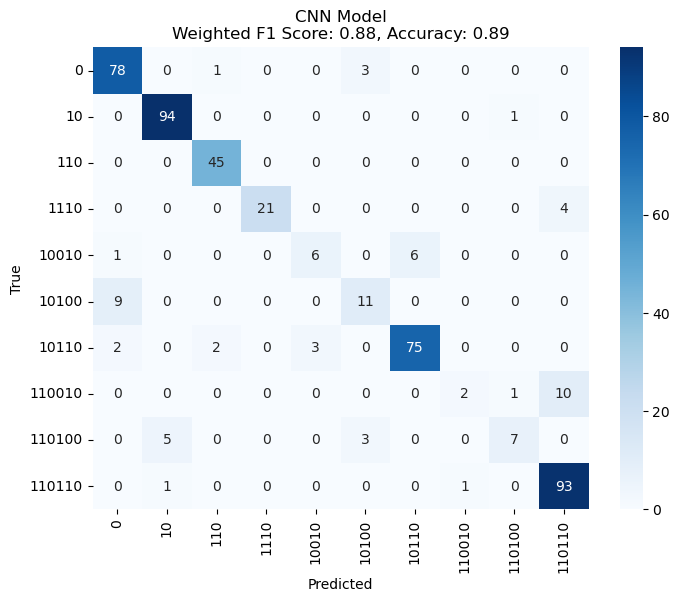

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

# Assuming you have ground truth labels and predicted labels for your CNN model
true_labels = test_labels
cnn_predicted_labels = y_pred

# Assuming you have the class names in a list called class_names
class_names = ["0", "10", "110", "1110", "10010", "10100", "10110", "110010", "110100", "110110"]

# Calculate the confusion matrix for the CNN model
cnn_conf_matrix = confusion_matrix(true_labels, cnn_predicted_labels)

# Calculate the weighted F1 score and accuracy for the CNN model
cnn_weighted_f1_score = f1_score(true_labels, cnn_predicted_labels, average='weighted')
cnn_accuracy = accuracy_score(true_labels, cnn_predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"CNN Model\nWeighted F1 Score: {cnn_weighted_f1_score:.2f}, Accuracy: {cnn_accuracy:.2f}")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## reality Simulation

In [46]:
#read the files for future training
filename = 'cnn_length_test_v1.pkl'
file_path = 'C:\\python_intro\\final_project\\'
with open(file_path + filename, 'rb') as file:
    test_ratios = pickle.load(file)
#if the combined ratios is saving as a dataframe

In [47]:
#normalizing the extra columns
cols_to_normalize = test_ratios.columns[-3:]
scaler = MinMaxScaler()
# Normalize the last four columns
test_ratios[cols_to_normalize] = scaler.fit_transform(test_ratios[cols_to_normalize])
# Print the normalized DataFrame
flatten_test = test_ratios.values
graph_test = test_ratios.iloc[:, :2000].values

In [48]:
# Original dimensions
num_rows = 50
num_columns = 40
# Initialize an empty list to store the 2D arrays
unflattened_testing_arrays = []
# Iterate over each row of the flattened array
for row in graph_test:
    # Reshape the row into a 2D array
    unflattened_testing_row = row.reshape(num_rows, num_columns)
    # Append the unflattened row to the list
    unflattened_testing_arrays.append(unflattened_testing_row)
# Convert the list of 2D arrays into a new array
test_graph_array = np.array(unflattened_testing_arrays)
len(test_graph_array[0][0])

40

In [49]:
#generate the dataset after CNN processing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers

# Normalize data
scaler = MinMaxScaler()
scaler.fit(test_graph_array.reshape(test_graph_array.shape[0], -1))  # Fit the scaler on the flattened data

reality_data_normalized = scaler.transform(test_graph_array.reshape(test_graph_array.shape[0], -1))

# Reshape the normalized data back to 3D
reality_data_normalized_3d = reality_data_normalized.reshape(test_graph_array.shape)

# Add a channel dimension to the data
reality_data_normalized_3d = np.expand_dims(reality_data_normalized_3d, axis=-1)

#use the predefined CNN model to extract CNN features
cnn_reality_features = CNN_model(reality_data_normalized_3d)

In [50]:
#get the additional columns out and combine them with CNN data
additional_reality_data = test_ratios.iloc[:,-3:]

# Reset the index of the additional data
additional_reality_data.reset_index(drop=True, inplace=True)

# Convert the existing data to a DataFrame
cnn_reality_features_df = pd.DataFrame(cnn_reality_features)

# Merge the existing data and additional data based on their indexes
combined_reality_data = pd.merge(cnn_reality_features_df, additional_reality_data, left_index=True, right_index=True)
combined_reality_data

,0,1,2,3,4,5,6,7,8,9,...,6137,6138,6139,6140,6141,6142,6143,2000_y,2001_y,2002_y
0,3.143443e-03,0.000000e+00,3.653962e-09,7.165072e-03,0.000000e+00,0.000000e+00,5.304383e-04,0.000000e+00,0.000000e+00,1.505028e-03,...,1.276692e-09,2.261863e-09,0.015116,0.000000e+00,0.004101,0.000000,0.009151,0.102768,0.075973,0.203448
1,4.990599e-03,0.000000e+00,1.701235e-02,8.924013e-03,5.661292e-03,6.147324e-04,0.000000e+00,8.917982e-03,3.163033e-10,1.083608e-09,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.513774,0.564726,0.427586
2,1.344644e-03,0.000000e+00,6.483747e-03,5.129048e-03,2.208906e-03,2.313673e-10,1.032210e-10,3.448507e-10,0.000000e+00,2.354737e-09,...,0.000000e+00,1.390970e-03,0.000000,2.706812e-02,0.000000,0.013429,0.021214,0.193660,0.993474,0.975862
3,8.524376e-09,0.000000e+00,7.794736e-09,1.618614e-08,9.543738e-09,1.326327e-08,9.002353e-09,5.776849e-09,0.000000e+00,0.000000e+00,...,6.201506e-03,3.469240e-04,0.000000,2.875584e-02,0.000000,0.020053,0.023430,0.135353,0.747634,0.787931
4,6.176866e-03,0.000000e+00,2.481252e-02,1.040324e-02,1.350064e-02,4.888442e-03,0.000000e+00,4.334008e-03,8.644213e-10,7.098471e-03,...,9.116746e-03,0.000000e+00,0.000000,8.481056e-03,0.006615,0.025485,0.007942,0.076350,0.071614,0.151724
5,7.318684e-03,0.000000e+00,3.023249e-02,1.526089e-02,1.893229e-02,6.913224e-03,0.000000e+00,9.396272e-03,2.908577e-09,2.092783e-03,...,2.640018e-02,8.350329e-03,0.000000,2.550299e-02,0.000000,0.023581,0.012945,0.108871,0.098554,0.137931
6,4.432609e-03,3.235276e-10,1.542507e-02,1.231404e-02,4.694200e-03,1.250032e-03,1.571742e-04,5.350571e-10,0.000000e+00,7.231415e-04,...,0.000000e+00,3.342788e-04,0.010553,1.070170e-02,0.001115,0.002678,0.039096,0.142613,0.172607,0.279310
7,9.288116e-03,6.211717e-10,2.369268e-02,1.397167e-02,9.728201e-03,3.437246e-03,2.218399e-04,1.702519e-09,1.504128e-09,4.004530e-03,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.166985,0.040961,0.155172
8,3.823252e-03,0.000000e+00,1.207791e-02,6.451665e-03,5.551585e-03,2.286597e-03,1.621408e-03,2.709599e-03,2.240876e-09,3.166305e-09,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.381519,0.703181,0.648276
9,4.230906e-03,9.553951e-04,1.397833e-02,8.042505e-03,7.378260e-03,1.703922e-03,0.000000e+00,8.445100e-03,0.000000e+00,3.077502e-04,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.520852,0.587502,0.500000


In [51]:
#train the NN for 5 times and get the average results
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

CNN_all = []
for i in range(5):
    # Define and compile neural network model
    #define the model
    model = keras.Sequential([
        #keras.layers.Flatten(),
        #keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(256, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        #keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
        #keras.layers.Dense(1, activation='sigmoid')
    ])
    # Add layers to the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(combined_training_data, train_labels_add, epochs=100, batch_size=32, validation_data=(combined_testing_data, test_labels_add), callbacks=[early_stopping])
    # Use the model obtained at the end of training
    predictions = model.predict(combined_reality_data)
    CNN_all.append(predictions)
#get the average values of 5 times of training
CNN_average = np.mean(CNN_all, axis=0)

Epoch 1/100
60/60 [==============================] - 1s 10ms/step - loss: 1.8722 - accuracy: 0.4115 - val_loss: 1.5223 - val_accuracy: 0.6701
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 1.3502 - accuracy: 0.6789 - val_loss: 1.2081 - val_accuracy: 0.7031
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 1.0906 - accuracy: 0.7420 - val_loss: 1.0090 - val_accuracy: 0.7608
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 0.9142 - accuracy: 0.7807 - val_loss: 0.8686 - val_accuracy: 0.7856
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.7948 - accuracy: 0.7963 - val_loss: 0.7723 - val_accuracy: 0.8124
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.7044 - accuracy: 0.8125 - val_loss: 0.6947 - val_accuracy: 0.8144
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.6336 - accuracy: 0.8272 - val_loss: 0.6383 - val_accuracy: 0.8330
Epoch 8/100


1/1 [==============================] - 0s 46ms/step
Epoch 1/100
60/60 [==============================] - 1s 9ms/step - loss: 1.8873 - accuracy: 0.4715 - val_loss: 1.6001 - val_accuracy: 0.5897
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 1.4504 - accuracy: 0.6339 - val_loss: 1.3140 - val_accuracy: 0.6351
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 1.2118 - accuracy: 0.6804 - val_loss: 1.1228 - val_accuracy: 0.7052
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 1.0382 - accuracy: 0.7248 - val_loss: 0.9722 - val_accuracy: 0.7485
Epoch 5/100
60/60 [==============================] - 0s 7ms/step - loss: 0.8955 - accuracy: 0.7640 - val_loss: 0.8599 - val_accuracy: 0.7691
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.7882 - accuracy: 0.7896 - val_loss: 0.7650 - val_accuracy: 0.7918
Epoch 7/100
60/60 [==============================] - 0s 5ms/step - loss: 0.7066 - accuracy: 0.8136 - v

60/60 [==============================] - 1s 11ms/step - loss: 1.8857 - accuracy: 0.3608 - val_loss: 1.6431 - val_accuracy: 0.5567
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 1.5108 - accuracy: 0.6204 - val_loss: 1.3893 - val_accuracy: 0.6722
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 1.2813 - accuracy: 0.6794 - val_loss: 1.1914 - val_accuracy: 0.7052
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 1.0918 - accuracy: 0.7159 - val_loss: 1.0268 - val_accuracy: 0.7485
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.9405 - accuracy: 0.7666 - val_loss: 0.8886 - val_accuracy: 0.7835
Epoch 6/100
60/60 [==============================] - 0s 7ms/step - loss: 0.8130 - accuracy: 0.7969 - val_loss: 0.7936 - val_accuracy: 0.7897
Epoch 7/100
60/60 [==============================] - 0s 7ms/step - loss: 0.7255 - accuracy: 0.8089 - val_loss: 0.7168 - val_accuracy: 0.8144
Epoch 8/100
60/60 [=====

60/60 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.8433 - val_loss: 0.6023 - val_accuracy: 0.8392
Epoch 9/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5425 - accuracy: 0.8517 - val_loss: 0.5696 - val_accuracy: 0.8351
Epoch 10/100
60/60 [==============================] - 0s 5ms/step - loss: 0.5117 - accuracy: 0.8564 - val_loss: 0.5383 - val_accuracy: 0.8557
Epoch 11/100
60/60 [==============================] - 0s 5ms/step - loss: 0.4777 - accuracy: 0.8632 - val_loss: 0.5173 - val_accuracy: 0.8577
Epoch 12/100
60/60 [==============================] - 0s 7ms/step - loss: 0.4506 - accuracy: 0.8684 - val_loss: 0.5005 - val_accuracy: 0.8619
Epoch 13/100
60/60 [==============================] - 0s 6ms/step - loss: 0.4356 - accuracy: 0.8710 - val_loss: 0.4862 - val_accuracy: 0.8536
Epoch 14/100
60/60 [==============================] - 0s 5ms/step - loss: 0.4138 - accuracy: 0.8757 - val_loss: 0.4696 - val_accuracy: 0.8619
Epoch 15/100
60/60 [

60/60 [==============================] - 0s 6ms/step - loss: 0.4108 - accuracy: 0.8752 - val_loss: 0.4653 - val_accuracy: 0.8577
Epoch 15/100
60/60 [==============================] - 0s 6ms/step - loss: 0.3941 - accuracy: 0.8799 - val_loss: 0.4646 - val_accuracy: 0.8577
Epoch 16/100
60/60 [==============================] - 0s 7ms/step - loss: 0.3849 - accuracy: 0.8815 - val_loss: 0.4512 - val_accuracy: 0.8722
Epoch 17/100
60/60 [==============================] - 0s 7ms/step - loss: 0.3697 - accuracy: 0.8862 - val_loss: 0.4425 - val_accuracy: 0.8680
Epoch 18/100
60/60 [==============================] - 0s 6ms/step - loss: 0.3570 - accuracy: 0.8888 - val_loss: 0.4481 - val_accuracy: 0.8536
Epoch 19/100
60/60 [==============================] - 0s 7ms/step - loss: 0.3488 - accuracy: 0.8940 - val_loss: 0.4318 - val_accuracy: 0.8742
Epoch 20/100
60/60 [==============================] - 0s 7ms/step - loss: 0.3341 - accuracy: 0.8940 - val_loss: 0.4300 - val_accuracy: 0.8660
Epoch 21/100
60/60 

In [52]:
labels = np.array([0,10,110,1110,10010,10100,10110,110010,110100,110110])
all_probabilities = [
    CNN_average
]

results = []  # List to store the results

for probabilities in all_probabilities:
    # Get the top 3 labels with highest probabilities for each event
    top3_labels = np.argsort(-probabilities, axis=1)[:, :3]  # Indices of top 3 labels for each event

    # Retrieve the label names and corresponding probabilities
    top3_labels_names = np.take(labels, top3_labels)  # Retrieve the label names based on indices
    top3_probabilities = np.take_along_axis(probabilities, top3_labels, axis=1)  # Retrieve corresponding probabilities

    # Create a DataFrame to store the results for the current set
    set_results = pd.DataFrame({
        'Event': np.arange(1, len(probabilities) + 1),  # Event numbers
        'Label 1': top3_labels_names[:, 0],
        'Label 2': top3_labels_names[:, 1],
        'Label 3': top3_labels_names[:, 2],
        'Probability 1': top3_probabilities[:, 0],
        'Probability 2': top3_probabilities[:, 1],
        'Probability 3': top3_probabilities[:, 2]
    })

    results.append(set_results)  # Add the results of the current set to the list

# Concatenate all set results into a single DataFrame
all_results = pd.concat(results)

# Print the complete results
all_results

,Event,Label 1,Label 2,Label 3,Probability 1,Probability 2,Probability 3
0,1,10010,10110,0,0.500127,0.472208,0.027334
1,2,110110,10110,110010,0.639988,0.311819,0.048051
2,3,10,0,110100,0.996202,0.002082,0.001047
3,4,10110,110010,110110,0.329818,0.278162,0.186017
4,5,10110,0,10010,0.996013,0.003148,0.000836
5,6,10110,10010,0,0.655245,0.343210,0.001482
6,7,0,10100,10110,0.976673,0.022314,0.000854
7,8,10110,10010,0,0.992925,0.006815,0.000258
8,9,110110,110010,10110,0.997869,0.001852,0.000249
9,10,10110,0,10010,0.690555,0.291941,0.006886


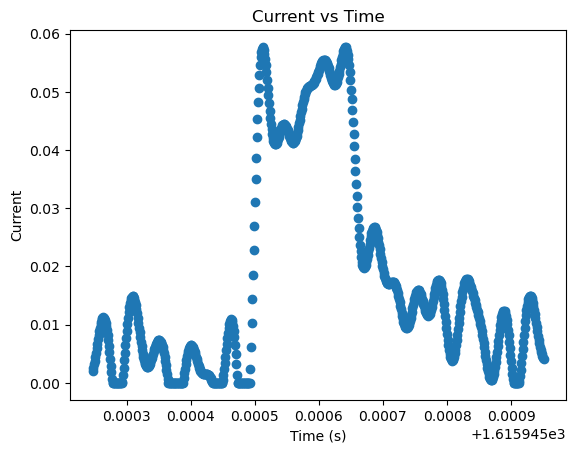

Event                1.000000
Label 1          10010.000000
Label 2          10110.000000
Label 3              0.000000
Probability 1        0.500127
Probability 2        0.472208
Probability 3        0.027334
Name: 0, dtype: float64


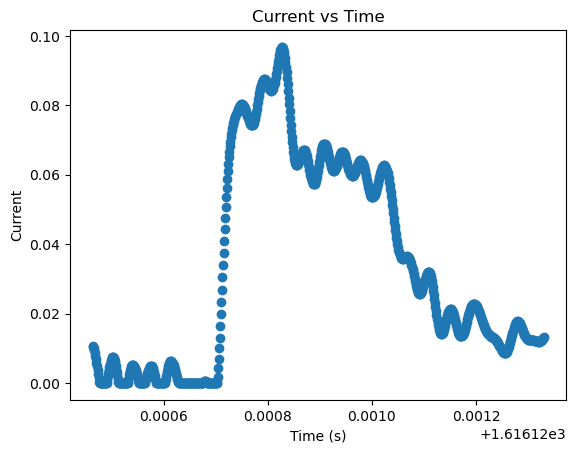

Event                 2.000000
Label 1          110110.000000
Label 2           10110.000000
Label 3          110010.000000
Probability 1         0.639988
Probability 2         0.311819
Probability 3         0.048051
Name: 1, dtype: float64


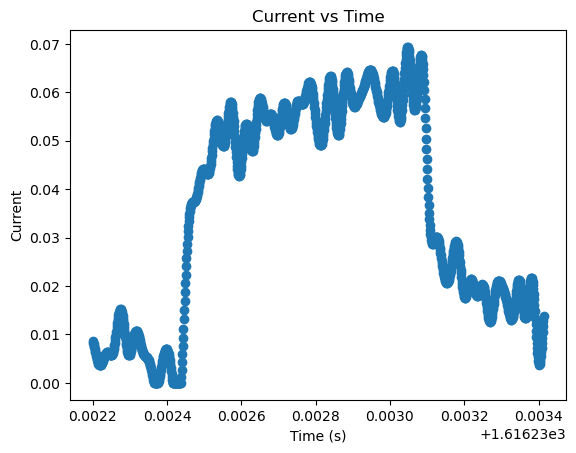

Event                 3.000000
Label 1              10.000000
Label 2               0.000000
Label 3          110100.000000
Probability 1         0.996202
Probability 2         0.002082
Probability 3         0.001047
Name: 2, dtype: float64


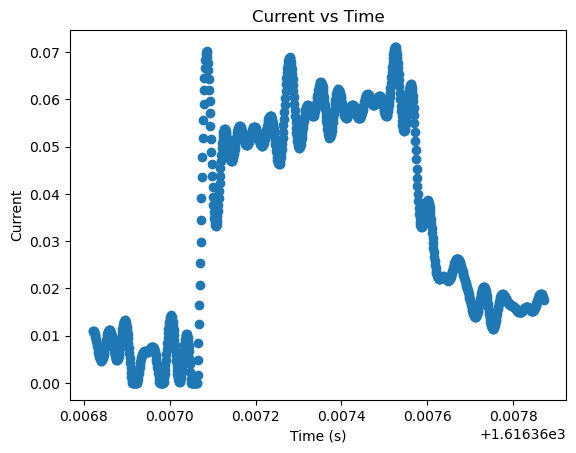

Event                 4.000000
Label 1           10110.000000
Label 2          110010.000000
Label 3          110110.000000
Probability 1         0.329818
Probability 2         0.278162
Probability 3         0.186017
Name: 3, dtype: float64


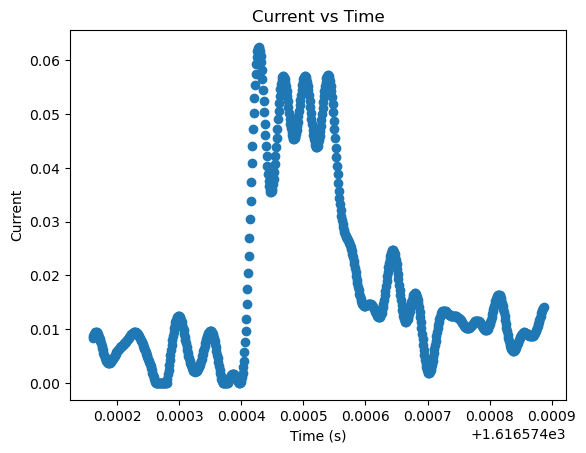

Event                5.000000
Label 1          10110.000000
Label 2              0.000000
Label 3          10010.000000
Probability 1        0.996013
Probability 2        0.003148
Probability 3        0.000836
Name: 4, dtype: float64


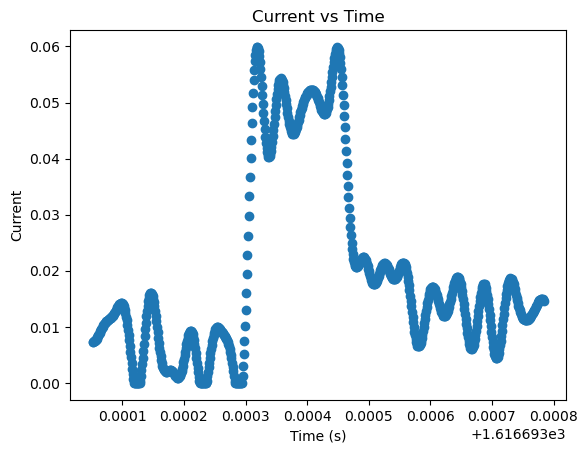

Event                6.000000
Label 1          10110.000000
Label 2          10010.000000
Label 3              0.000000
Probability 1        0.655245
Probability 2        0.343210
Probability 3        0.001482
Name: 5, dtype: float64


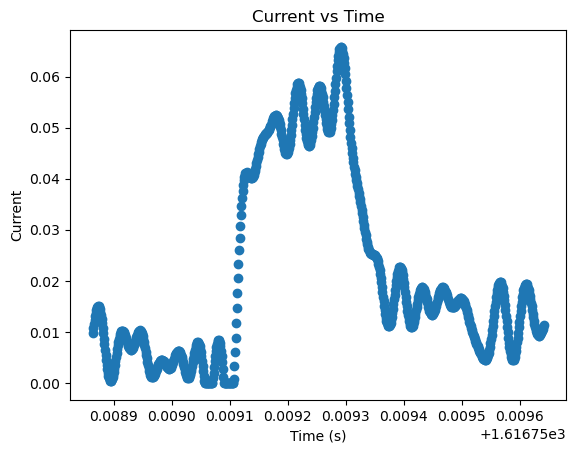

Event                7.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.976673
Probability 2        0.022314
Probability 3        0.000854
Name: 6, dtype: float64


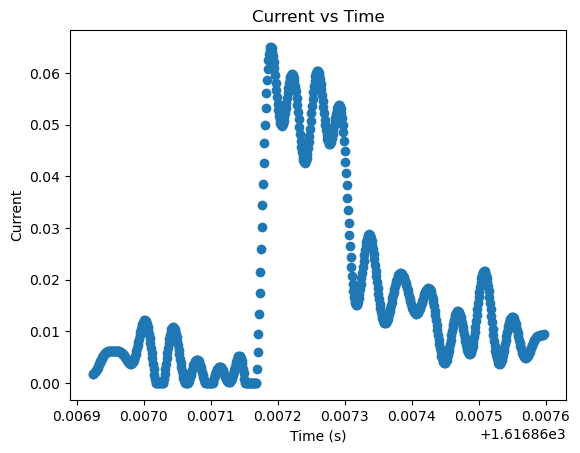

Event                8.000000
Label 1          10110.000000
Label 2          10010.000000
Label 3              0.000000
Probability 1        0.992925
Probability 2        0.006815
Probability 3        0.000258
Name: 7, dtype: float64


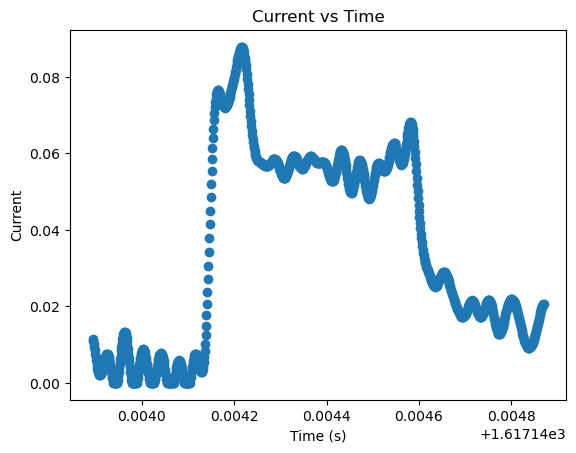

Event                 9.000000
Label 1          110110.000000
Label 2          110010.000000
Label 3           10110.000000
Probability 1         0.997869
Probability 2         0.001852
Probability 3         0.000249
Name: 8, dtype: float64


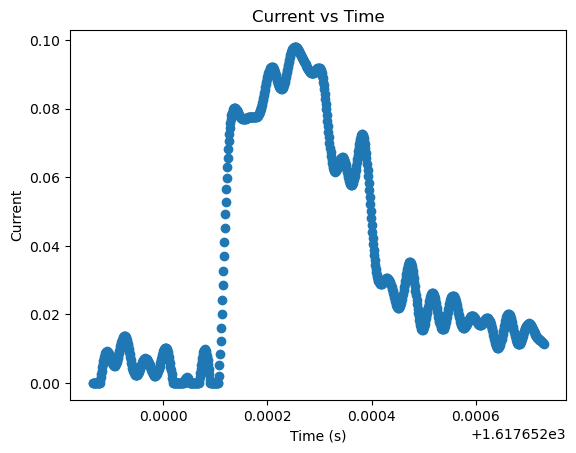

Event               10.000000
Label 1          10110.000000
Label 2              0.000000
Label 3          10010.000000
Probability 1        0.690555
Probability 2        0.291941
Probability 3        0.006886
Name: 9, dtype: float64


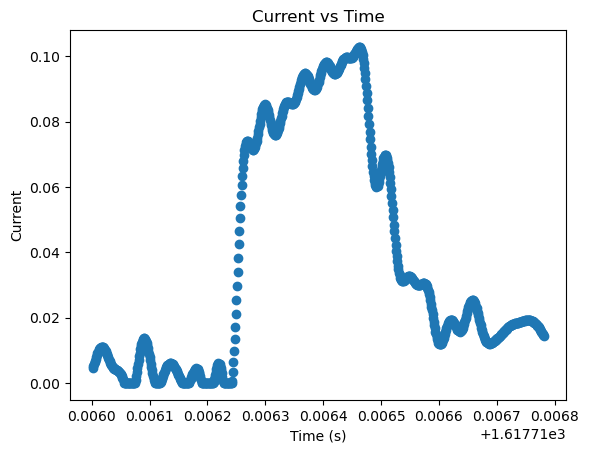

Event              11.000000
Label 1          1110.000000
Label 2             0.000000
Label 3           110.000000
Probability 1       0.992256
Probability 2       0.005936
Probability 3       0.001157
Name: 10, dtype: float64


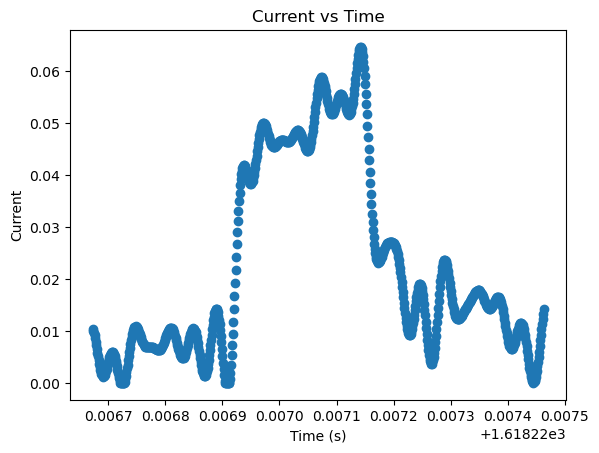

Event               12.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10010.000000
Probability 1        0.736191
Probability 2        0.263473
Probability 3        0.000305
Name: 11, dtype: float64


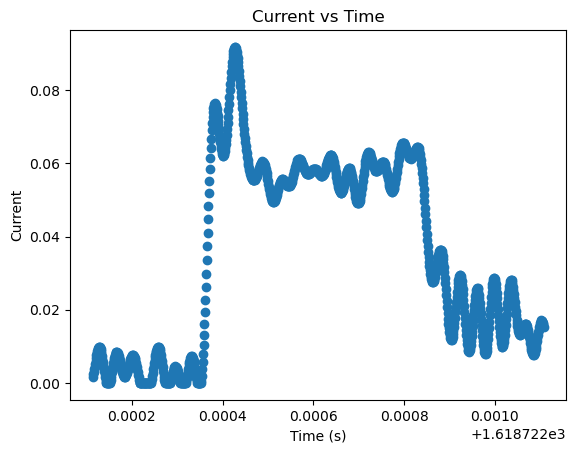

Event                13.000000
Label 1          110110.000000
Label 2          110010.000000
Label 3           10110.000000
Probability 1         0.999083
Probability 2         0.000744
Probability 3         0.000169
Name: 12, dtype: float64


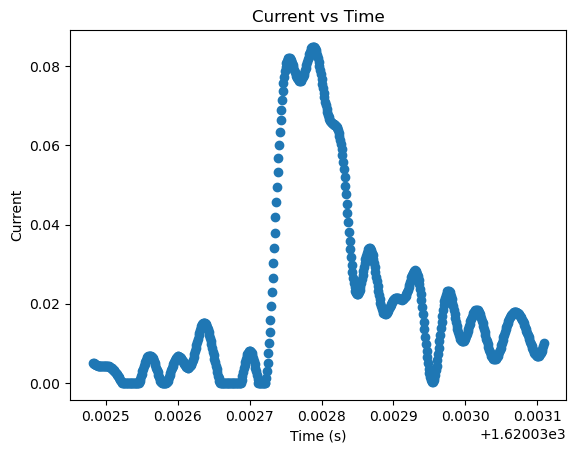

Event               14.000000
Label 1            110.000000
Label 2          10110.000000
Label 3              0.000000
Probability 1        0.991661
Probability 2        0.008336
Probability 3        0.000002
Name: 13, dtype: float64


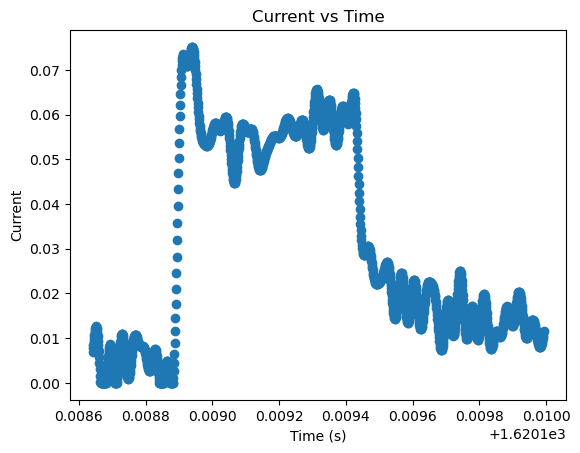

Event                15.000000
Label 1          110110.000000
Label 2           10110.000000
Label 3          110010.000000
Probability 1         0.716265
Probability 2         0.158197
Probability 3         0.112250
Name: 14, dtype: float64


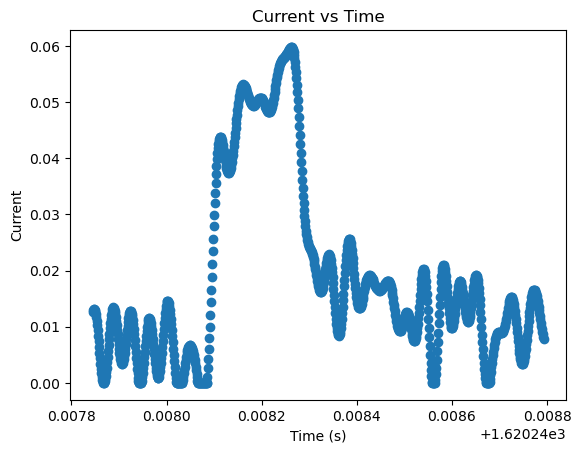

Event               16.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.953387
Probability 2        0.025159
Probability 3        0.020873
Name: 15, dtype: float64


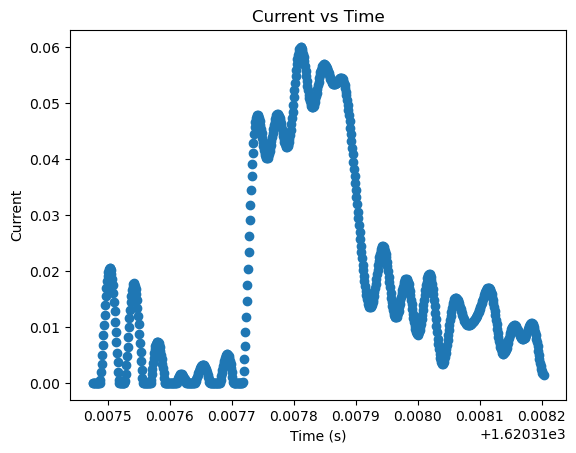

Event               17.000000
Label 1              0.000000
Label 2          10110.000000
Label 3          10100.000000
Probability 1        0.953654
Probability 2        0.044242
Probability 3        0.001860
Name: 16, dtype: float64


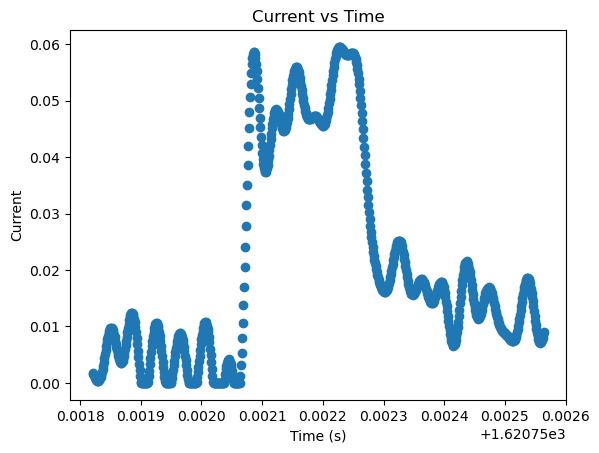

Event               18.000000
Label 1          10110.000000
Label 2          10010.000000
Label 3              0.000000
Probability 1        0.949688
Probability 2        0.048493
Probability 3        0.001663
Name: 17, dtype: float64


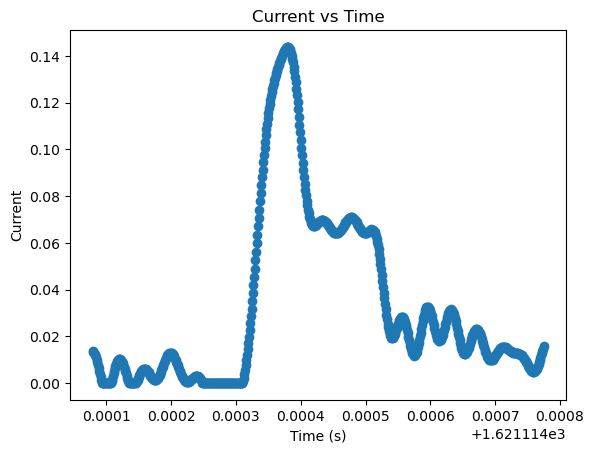

Event                19.000000
Label 1           10110.000000
Label 2           10010.000000
Label 3          110010.000000
Probability 1         0.958263
Probability 2         0.041543
Probability 3         0.000097
Name: 18, dtype: float64


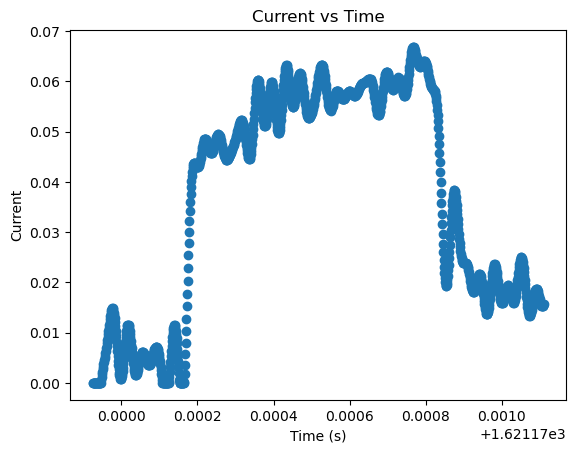

Event                20.000000
Label 1              10.000000
Label 2          110110.000000
Label 3               0.000000
Probability 1         0.987745
Probability 2         0.005562
Probability 3         0.004520
Name: 19, dtype: float64


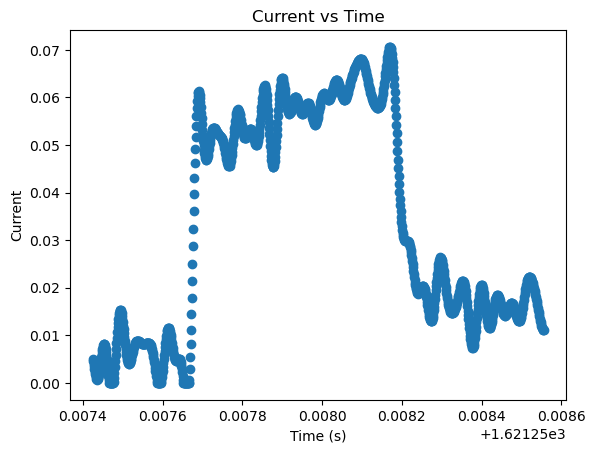

Event                21.000000
Label 1               0.000000
Label 2          110010.000000
Label 3          110110.000000
Probability 1         0.749669
Probability 2         0.121163
Probability 3         0.093095
Name: 20, dtype: float64


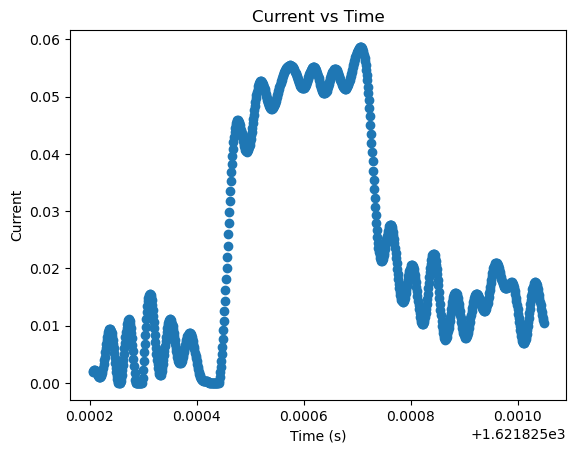

Event              22.000000
Label 1             0.000000
Label 2          1110.000000
Label 3           110.000000
Probability 1       0.999046
Probability 2       0.000690
Probability 3       0.000187
Name: 21, dtype: float64


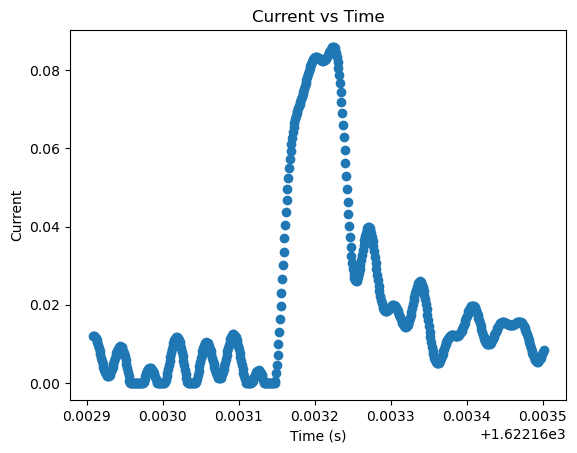

Event               23.000000
Label 1            110.000000
Label 2              0.000000
Label 3          10110.000000
Probability 1        0.550527
Probability 2        0.448899
Probability 3        0.000257
Name: 22, dtype: float64


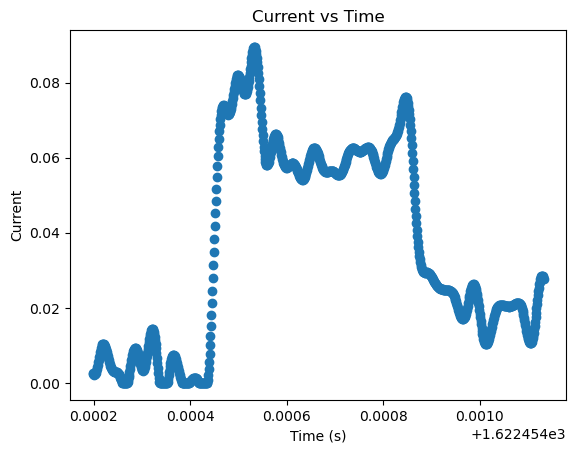

Event                24.000000
Label 1          110110.000000
Label 2          110010.000000
Label 3           10110.000000
Probability 1         0.660474
Probability 2         0.336766
Probability 3         0.002450
Name: 23, dtype: float64


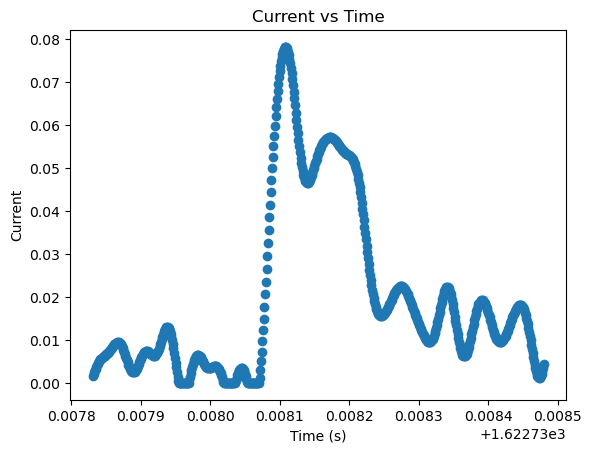

Event                25.000000
Label 1           10110.000000
Label 2           10010.000000
Label 3          110010.000000
Probability 1         0.998696
Probability 2         0.001303
Probability 3         0.000001
Name: 24, dtype: float64


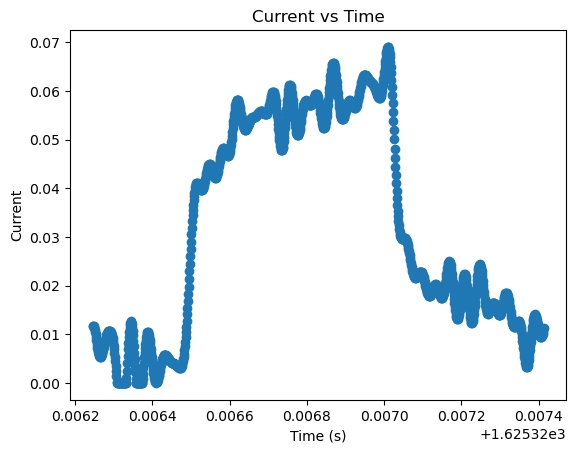

Event                26.000000
Label 1              10.000000
Label 2               0.000000
Label 3          110100.000000
Probability 1         0.635264
Probability 2         0.352330
Probability 3         0.008838
Name: 25, dtype: float64


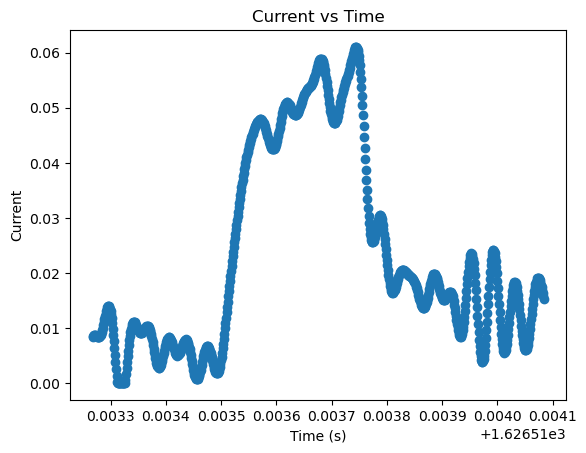

Event               27.000000
Label 1              0.000000
Label 2          10100.000000
Label 3          10110.000000
Probability 1        0.943997
Probability 2        0.055931
Probability 3        0.000036
Name: 26, dtype: float64


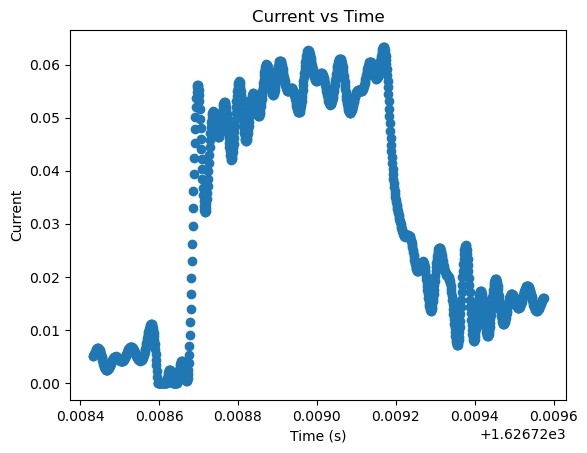

Event                28.000000
Label 1              10.000000
Label 2               0.000000
Label 3          110110.000000
Probability 1         0.517034
Probability 2         0.434523
Probability 3         0.027450
Name: 27, dtype: float64


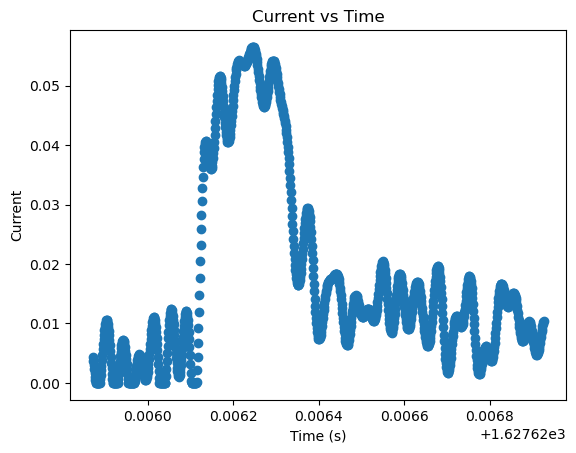

Event               29.000000
Label 1              0.000000
Label 2            110.000000
Label 3          10110.000000
Probability 1        0.974991
Probability 2        0.018711
Probability 3        0.005568
Name: 28, dtype: float64


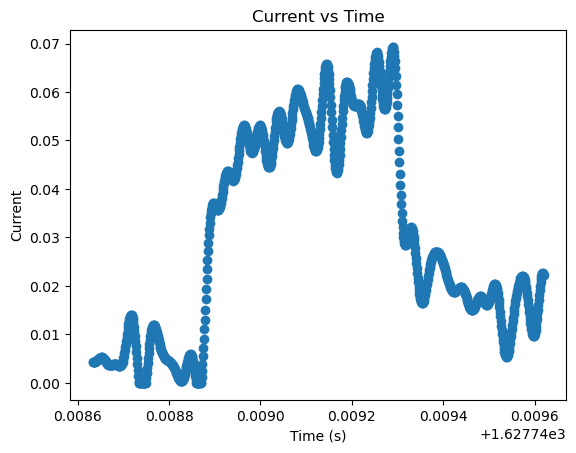

Event                30.000000
Label 1               0.000000
Label 2          110100.000000
Label 3           10100.000000
Probability 1         0.711817
Probability 2         0.222197
Probability 3         0.049430
Name: 29, dtype: float64


In [53]:
#load the testing dataset
# Load the .mat file
mat_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\event_test_length.mat')
peak_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\pkmax_test_length.mat')
width_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\width_test_length.mat')
area_file = scipy.io.loadmat('C:\\python_intro\\final_project\\matfiles\\test_files\\area_test_length.mat')

for i in range(len(mat_file["Event"][0])):
    # Access the data in the .mat file
    env_time = ((mat_file["Event"][0][i][0][0][2]).T)[0]
    env_current = ((mat_file["Event"][0][i][0][0][1]).T)[0]

    # Create a plot
    plt.scatter(env_time,env_current)
    plt.xlabel('Time (s)')
    plt.ylabel('Current')
    plt.title('Current vs Time')

    # Show the plot
    plt.show()
    print(all_results.iloc[i])